# Visualize General Social Survey Results

## Import Library
Import the following libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Load Data
Load 2019 General Social Survey.

In [2]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [3]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

### View frequencies of the categories of relationship
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree"

In [4]:
#convert relationship to category type
gss_clean['relationship'] = gss_clean['relationship'].astype('category')

#reorder categories in desired order
gss_clean['relationship'] = gss_clean['relationship'].cat.reorder_categories(['strongly agree','agree','disagree', 'strongly disagree'])

#store reordered categories
mybars = gss_clean.relationship.value_counts().sort_index()
mybars

strongly agree       480
agree                670
disagree             324
strongly disagree     76
Name: relationship, dtype: int64

Text(0.5, 1.0, 'Level of Agreement with Mothers Relationship to Children Based on Working')

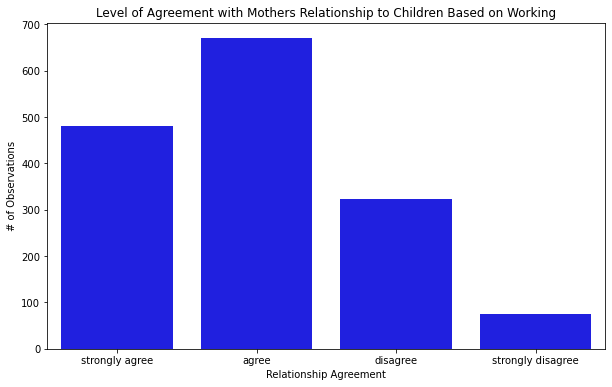

In [6]:
#barplot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=mybars.index, y=mybars.values, palette = ['blue', 'blue', 'blue', 'blue'])
plt.ylabel('# of Observations')
plt.xlabel('Relationship Agreement')
plt.title('Level of Agreement with Mothers Relationship to Children Based on Working')

### View relationship for men and women

In [8]:
#create df with relationship, sex, count for seaborn
gss_clean_plot = gss_clean.groupby(['relationship', 'sex']).size()
gss_clean_plot = gss_clean_plot.reset_index()
gss_clean_plot = gss_clean_plot.rename({0:'count'}, axis=1)
gss_clean_plot

,relationship,sex,count
0,strongly agree,female,337
1,strongly agree,male,143
2,agree,female,344
3,agree,male,326
4,disagree,female,146
5,disagree,male,178
6,strongly disagree,female,39
7,strongly disagree,male,37


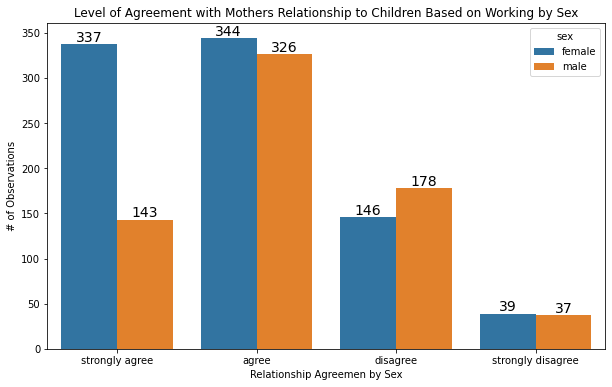

In [9]:
#seaborn bars oriented vertically
plt.figure(figsize=(10, 6))
myplot = sns.barplot(x='relationship', y= 'count', hue = 'sex', data = gss_clean_plot)
plt.ylabel('# of Observations')
plt.xlabel('Relationship Agreemen by Sex')
plt.title('Level of Agreement with Mothers Relationship to Children Based on Working by Sex')
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

### Expand on relationship by sex to view trends per region

In [12]:
#add onto df previously with region
gss_clean_plot = gss_clean.groupby(['relationship', 'sex', 'region']).size()
gss_clean_plot = gss_clean_plot.reset_index()
gss_clean_plot = gss_clean_plot.rename({0:'count'}, axis=1)
gss_clean_plot

,relationship,sex,region,count
0,strongly agree,female,e. nor. central,49
1,strongly agree,female,e. sou. central,19
2,strongly agree,female,middle atlantic,38
3,strongly agree,female,mountain,28
4,strongly agree,female,new england,28
...,...,...,...,...
67,strongly disagree,male,new england,1
68,strongly disagree,male,pacific,6
69,strongly disagree,male,south atlantic,8
70,strongly disagree,male,w. nor. central,4


C:\Users\Ben_Wilson_DS_Accoun\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Level of Agreement with Mothers Relationship to Children Based on Working by Region')

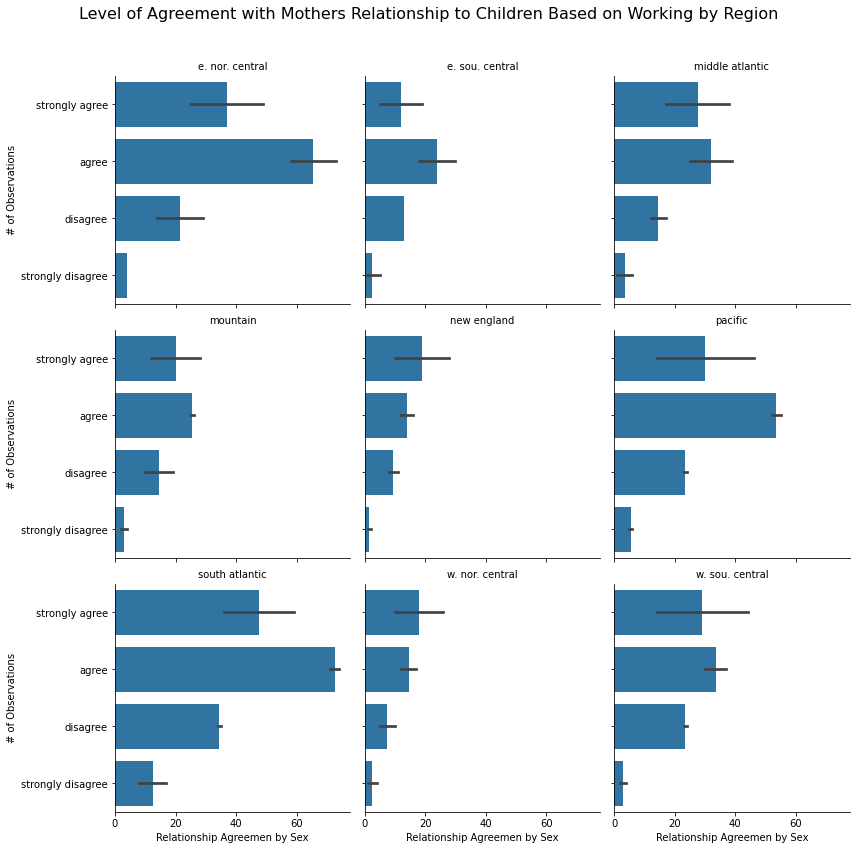

In [13]:
#barplot arrangement
viz = sns.FacetGrid(gss_clean_plot, col = 'region', col_wrap=3, height=4, aspect=1)
viz.map(sns.barplot, 'count', 'relationship')
viz.set_titles('{col_name}')
viz.set_axis_labels('Relationship Agreemen by Sex', '# of Observations') 
viz.fig.subplots_adjust(top=.9)
viz.fig.suptitle('Level of Agreement with Mothers Relationship to Children Based on Working by Region', fontsize=16)

### View impact of years of education on job prestige and socioeconomic index

In [14]:
#create df for line chart

#create df for education, job prestige, socioeconomic index
gss_clean_plot2 = gss_clean.groupby('education').agg({'job_prestige':'mean', 'socioeconomic_index':'mean'})
gss_clean_plot2 = gss_clean_plot2.reset_index()

#consolidate to long format
gss_clean_plot2 = pd.melt(gss_clean_plot2, id_vars = 'education',
                         value_vars = ['job_prestige', 'socioeconomic_index'])

#relabel columns
gss_clean_plot2 = gss_clean_plot2.rename({'variable':'Index', 'value':'Value'}, axis=1)

#relabel formatted data
gss_clean_plot2['Index'] = gss_clean_plot2['Index'].map({'job_prestige':'Occupational Prestige',
                                                     'socioeconomic_index':'Socioeconomic Status'})

#verify df developed properly
gss_clean_plot2

,education,Index,Value
0,0.0,Occupational Prestige,38.500000
1,1.0,Occupational Prestige,37.000000
2,2.0,Occupational Prestige,32.500000
3,3.0,Occupational Prestige,31.666667
4,4.0,Occupational Prestige,32.800000
5,5.0,Occupational Prestige,34.666667
6,6.0,Occupational Prestige,34.000000
7,7.0,Occupational Prestige,36.428571
8,8.0,Occupational Prestige,34.575758
9,9.0,Occupational Prestige,37.416667


(8.0, 20.0)

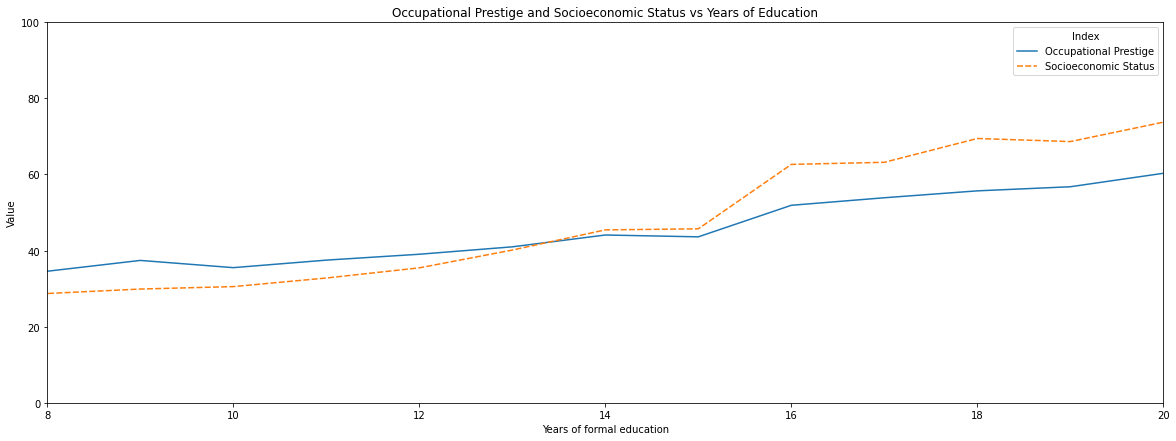

In [15]:
#plot line chart
plt.figure(figsize=(20,7))
sns.lineplot(x='education', y='Value', hue = 'Index', style = 'Index', data=gss_clean_plot2)
plt.xlabel('Years of formal education')
plt.ylabel('Value')
plt.title('Occupational Prestige and Socioeconomic Status vs Years of Education')
plt.ylim(0,100)
plt.xlim(8,20)

### View correlation between economic index and varying survey statistics

Text(0.5, 1.0, 'Correlation Between Personal Economic Indicators')

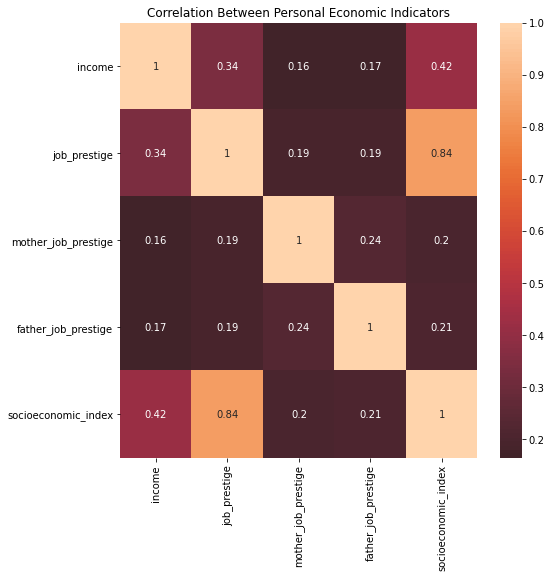

In [16]:
my_corr = gss_clean.loc[:,'income':'socioeconomic_index'].corr()
plt.figure(figsize = (8,8))
sns.heatmap(my_corr, annot=True, center = 0)
plt.title("Correlation Between Personal Economic Indicators")

### View income vs occupational prestige by education 

Text(0.5, 0.98, 'Income vs. Prestige by Education')

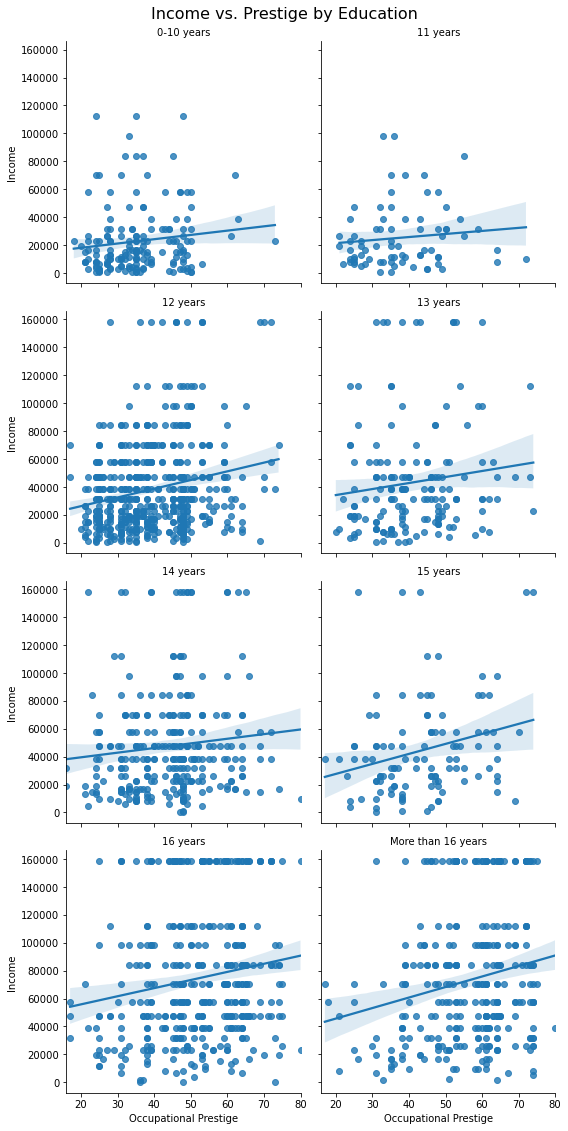

In [17]:
#create bins for education categories
gss_clean['educ_group'] = pd.cut(gss_clean.education, bins = [-1,10,11, 12, 13, 14, 15, 16, 1000], labels = ("0-10 years", "11 years", "12 years", "13 years", "14 years", "15 years", "16 years", "More than 16 years"))

#create scatterplot chart
scat = sns.FacetGrid(gss_clean, col = 'educ_group', col_wrap=2, height=4, aspect=1)
scat.map(sns.regplot, 'job_prestige', 'income')
scat.set_titles('{col_name}')
scat.set_axis_labels('Occupational Prestige', 'Income') 
scat.fig.subplots_adjust(top=.95)
scat.fig.suptitle('Income vs. Prestige by Education', fontsize=16)

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). Investigate two questions:

1. Do men have higher incomes than women?

2. Is difference due to the fact that men have jobs with higher occupational prestige than women?

#### Do men have higher incomes than women answer
Regarding statement 1 - yes, men do have higher incomes than women. 

From reviewing the mean and median incomes between sex by region (see bar charts), men's incomes are consistently higher. By reviewing this question through the lens of median which no longer skews our math by outliers on the male side, there is a closer variance with only 5 of 9 regions supporting male income >= female income compared to 7 of 9 when using mean. This argument is supported as well by reviewing mean and median incomes by sex (see line chart below) as associated with years of education. Once males and females progress beyond 6 years of education, men have consistently higher incomes than women, with women only exceeding or equalling men's salary's 2 of 14 years worth of experience for mean and 4 of 14 years worth of experience for median. It is important to note though that these significant differences are primarily occurring in the mid atlantic, west south central and east south central as can be seen from the box plot. Although women lead men in new england and east north central while remaining fairly consistent in all other regions, the three regions where men lead show significant increases outside of outliers. 

#### Is difference due to fact that men have jobs with higher occupational prestige than women answer
In addition to those attributes which factor into male incomes > female incomes in the prior question, we can also state that job prestige is indeed a factor leading to male incomes being larger. This can be seen from the scatter diagram 'Income vs Job Prestige by Sex' where the linear model mapped to each sex shows women having a higher income compared to lower job prestige whereas for men, as job prestige grows so to does their salary at a greater rate than women. When looking at this analysis by region in the 'Income vs. Job Prestige by Region & Sex' facet grid of scatter plots, we can see a consistent trend of job prestige impact mens salarys, increasing the salary as prestige increases (only 1 of 9 regions do women have a greater relationship between income and prestige). 

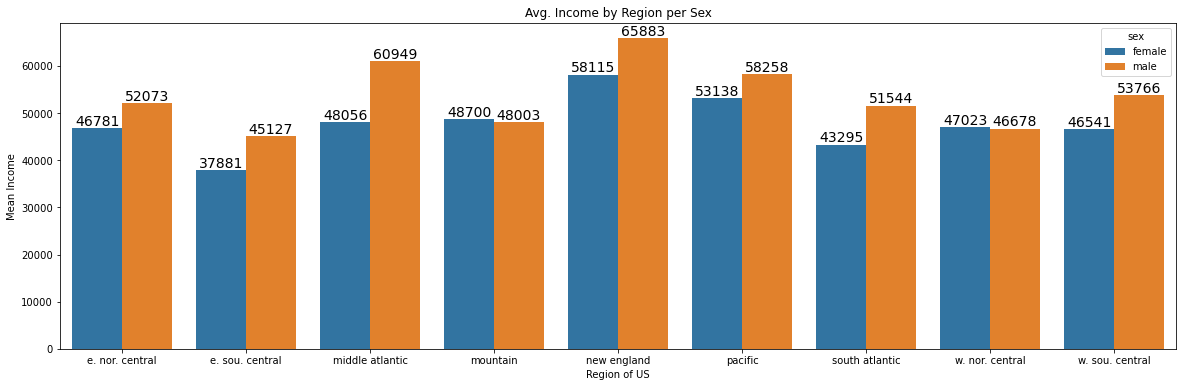

In [18]:
#create df with mean
gss_clean_sex_avg = gss_clean.groupby(['sex', 'region']).agg({'income': 'mean'})
gss_clean_sex_avg = gss_clean_sex_avg.reset_index()

#seaborn bars for mean
plt.figure(figsize=(20, 6))
myplot = sns.barplot(x='region', y= 'income', hue = 'sex', data = gss_clean_sex_avg)
plt.ylabel('Mean Income')
plt.xlabel('Region of US')
plt.title('Avg. Income by Region per Sex')
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

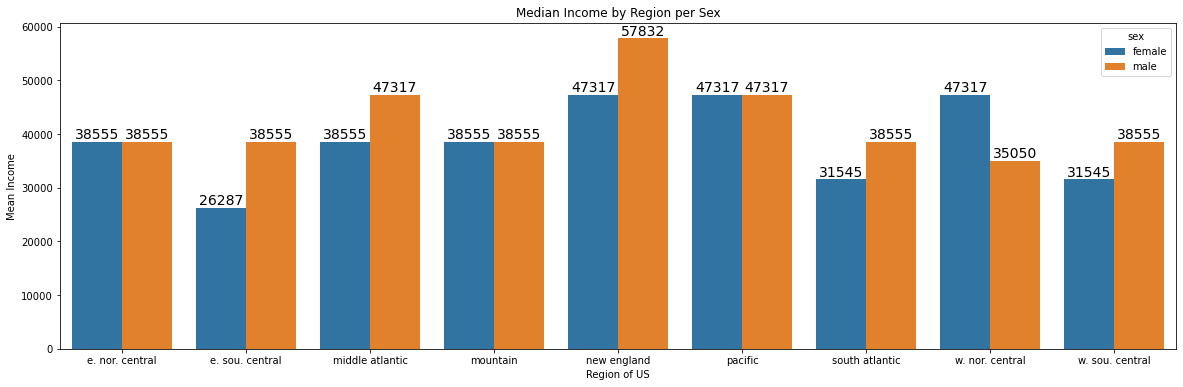

In [19]:
#create df with median
gss_clean_sex_avg = gss_clean.groupby(['sex', 'region']).agg({'income': 'median'})
gss_clean_sex_avg = gss_clean_sex_avg.reset_index()

#seaborn bars for median
plt.figure(figsize=(20, 6))
myplot = sns.barplot(x='region', y= 'income', hue = 'sex', data = gss_clean_sex_avg)
plt.ylabel('Mean Income')
plt.xlabel('Region of US')
plt.title('Median Income by Region per Sex')
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

(2.5, 20.0)

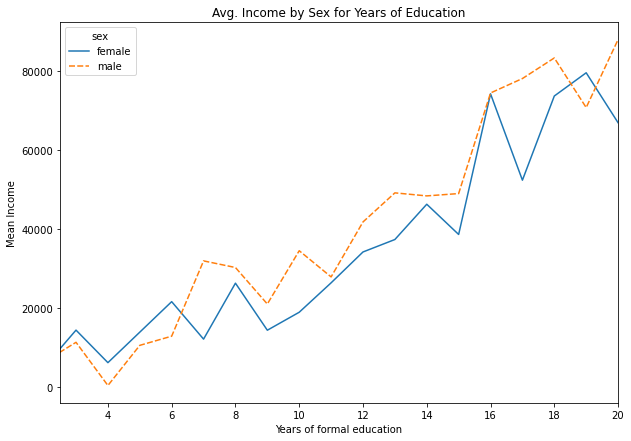

In [20]:
#create df for mean line chart

#create df for education, job prestige, socioeconomic index
gss_clean_educ = gss_clean.groupby(['education', 'sex']).agg({'income':'mean'})
gss_clean_educ = gss_clean_educ.reset_index()

#consolidate to long format
gss_clean_educ = pd.melt(gss_clean_educ, id_vars = ['education', 'sex'],
                         value_vars = ['income'])

#relabel columns
gss_clean_educ = gss_clean_educ.rename({'value':'mean income'}, axis=1)

#plot line chart
plt.figure(figsize=(10,7))
sns.lineplot(x='education', y='mean income', hue = 'sex', style = 'sex', data=gss_clean_educ)
plt.xlabel('Years of formal education')
plt.ylabel('Mean Income')
plt.title('Avg. Income by Sex for Years of Education')
plt.xlim(2.5,20)

(2.5, 20.0)

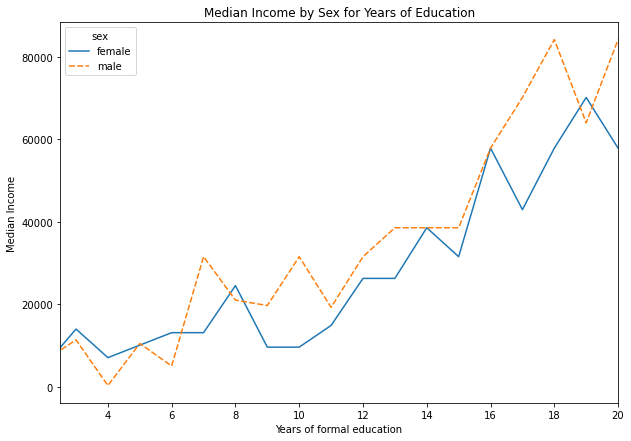

In [21]:
#create df for median line chart

#create df for education, job prestige, socioeconomic index
gss_clean_educ = gss_clean.groupby(['education', 'sex']).agg({'income':'median'})
gss_clean_educ = gss_clean_educ.reset_index()

#consolidate to long format
gss_clean_educ = pd.melt(gss_clean_educ, id_vars = ['education', 'sex'],
                         value_vars = ['income'])

#relabel columns
gss_clean_educ = gss_clean_educ.rename({'value':'median income'}, axis=1)

#plot line chart
plt.figure(figsize=(10,7))
sns.lineplot(x='education', y='median income', hue = 'sex', style = 'sex', data=gss_clean_educ)
plt.xlabel('Years of formal education')
plt.ylabel('Median Income')
plt.title('Median Income by Sex for Years of Education')
plt.xlim(2.5,20)

Text(0.5, 1.0, 'Histogram of Income by Sex')

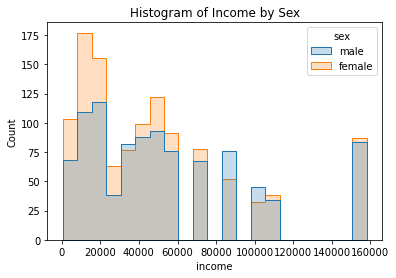

In [22]:
sns.histplot(data=gss_clean, x='income', hue='sex', element = 'step')
plt.title('Histogram of Income by Sex')

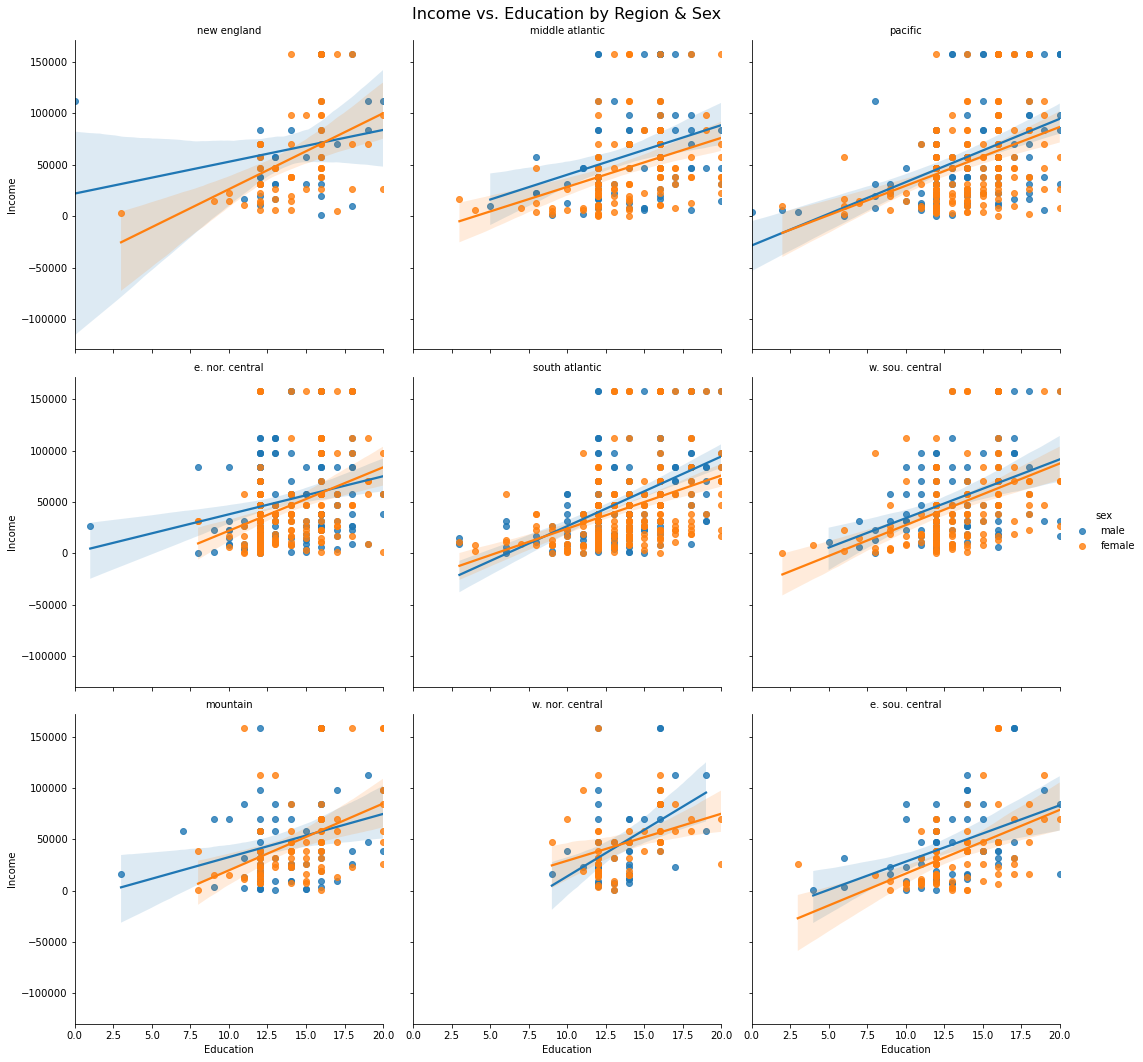

In [23]:
#create scatterplot chart
scat_sex = sns.FacetGrid(gss_clean, col = 'region', hue = 'sex', col_wrap=3, height=5, aspect=1)
scat_sex.map(sns.regplot, 'education', 'income')
scat_sex.set_titles('{col_name}')
scat_sex.set_axis_labels('Education', 'Income') 
scat_sex.fig.subplots_adjust(top=.95)
scat_sex.fig.suptitle('Income vs. Education by Region & Sex', fontsize=16)
scat_sex.add_legend()

C:\Users\Ben_Wilson_DS_Accoun\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


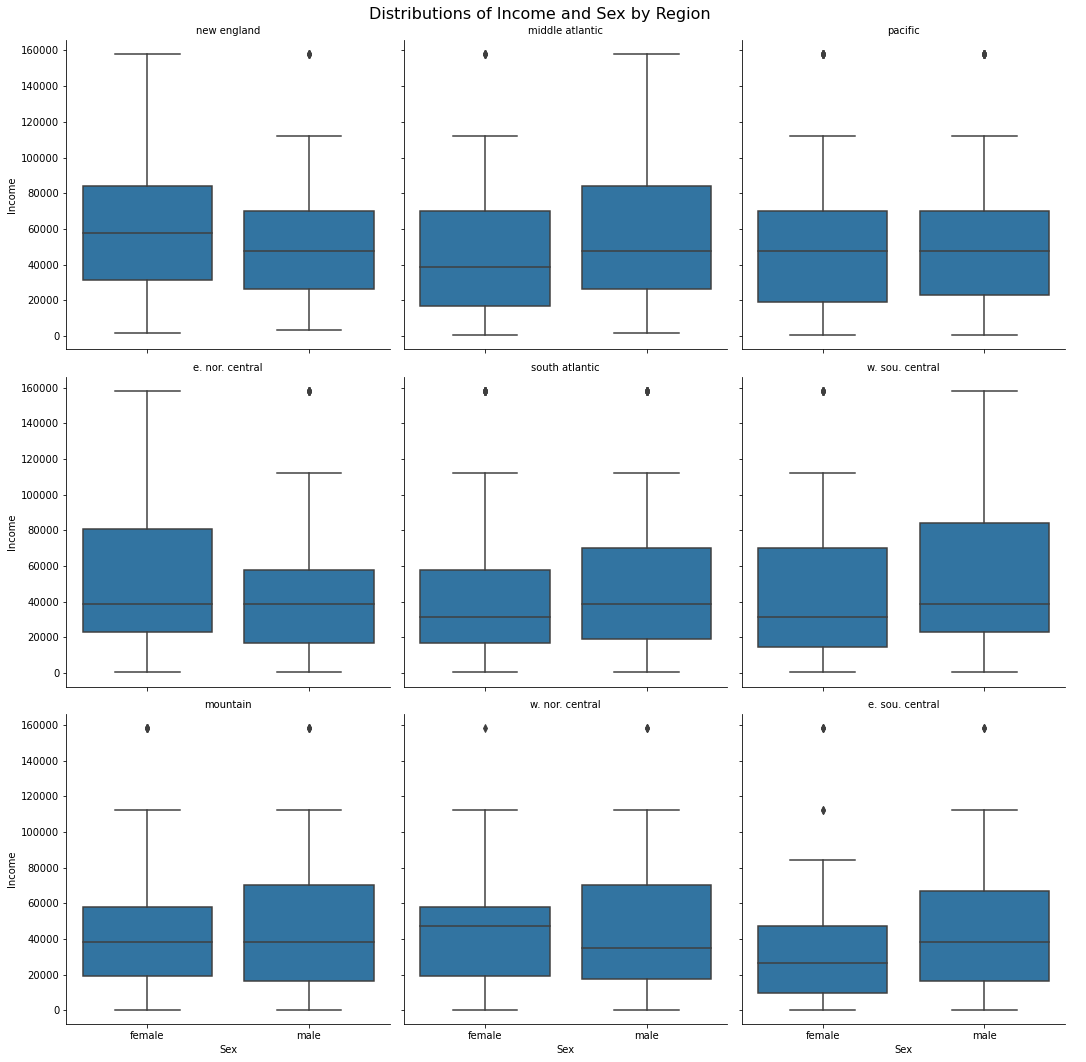

In [24]:
#create boxplot chart
box_sex = sns.FacetGrid(gss_clean, col = 'region', col_wrap=3, height=5, aspect=1)
box_sex.map(sns.boxplot, 'sex', 'income')
box_sex.set_titles('{col_name}')
box_sex.set_axis_labels('Sex', 'Income') 
box_sex.fig.subplots_adjust(top=.95)
box_sex.fig.suptitle('Distributions of Income and Sex by Region', fontsize=16)
box_sex.add_legend()

Text(0.5, 1.0, 'Income vs Job Prestige by Sex')

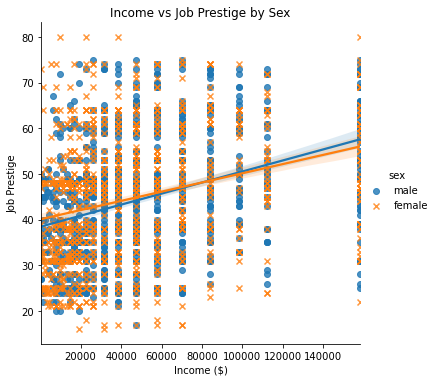

In [27]:
sns.lmplot(x="income", y="job_prestige", hue="sex", data=gss_clean, markers=["o", "x"])
plt.xlabel('Income ($)')
plt.ylabel('Job Prestige')
plt.title('Income vs Job Prestige by Sex')

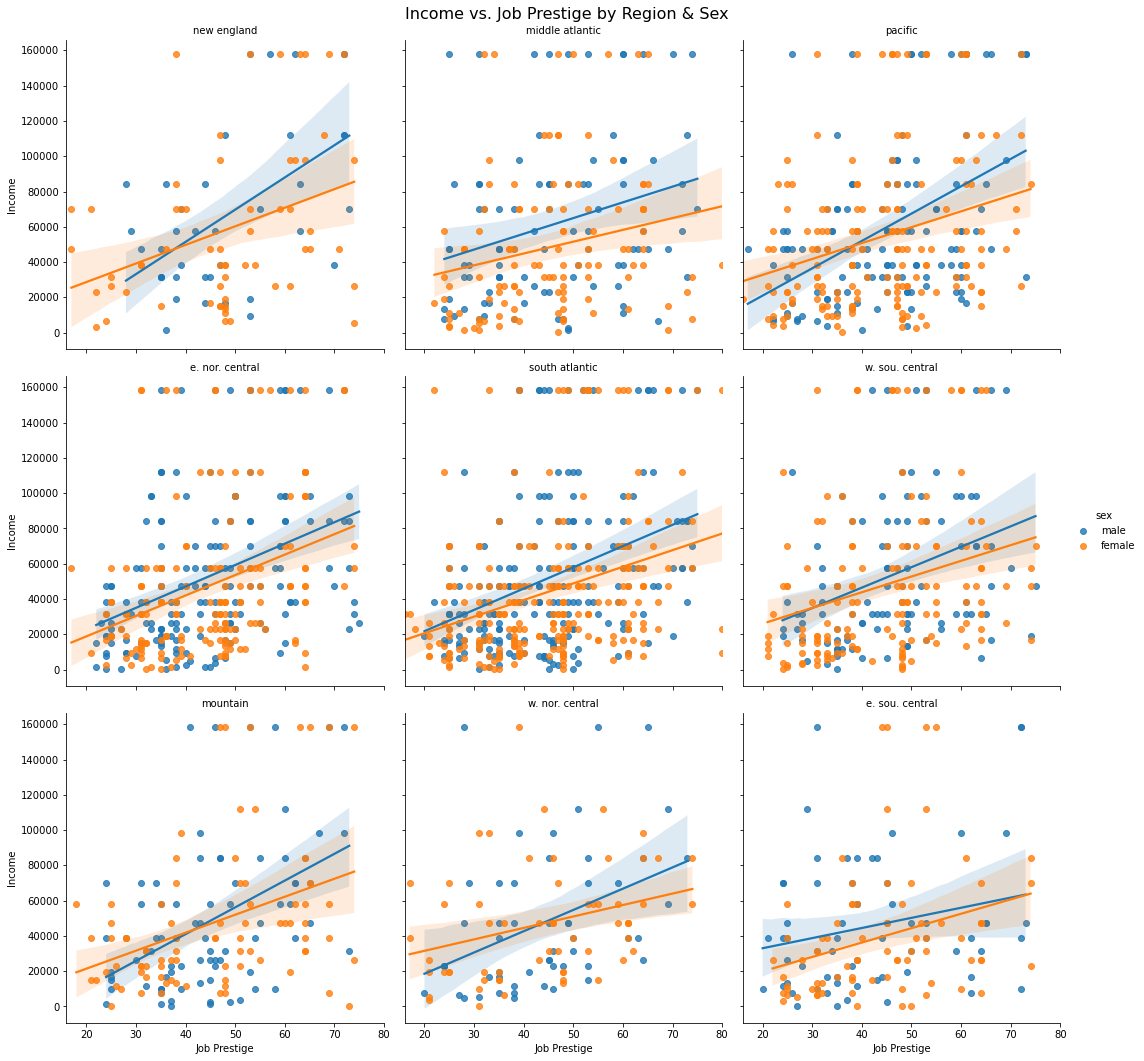

In [28]:
#create scatterplot chart
scat_sex2 = sns.FacetGrid(gss_clean, col = 'region', hue = 'sex', col_wrap=3, height=5, aspect=1)
scat_sex2.map(sns.regplot, 'job_prestige', 'income')
scat_sex2.set_titles('{col_name}')
scat_sex2.set_axis_labels('Job Prestige', 'Income') 
scat_sex2.fig.subplots_adjust(top=.95)
scat_sex2.fig.suptitle('Income vs. Job Prestige by Region & Sex', fontsize=16)
scat_sex2.add_legend()